Universidad Galileo

Ciencia de Datos en Python

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

# Ejercicios Vectores




In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio No. 1
**Ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**Nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [2]:
# tu codigo aqui (~ 5 lineas de codigo):
x1 = np.arange(0,0.6,0.1)  # Primer vector, con step de 0.1
x2 = np.arange(0.51,0.6,0.01)  # Segundo vector, con step de 0.01
x3 = np.arange(0.6,1.05,0.1)  # Tercer vector, con step de 0.1
xs=np.hstack((x1,x2,x3))  # hstack para concatenar horizontalmente los tres vectores
print(xs) # despliegue del vector concatenado

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


## Ejercicio No. 2

In [3]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#xs es "x suavizado", inicialmente es una copia de x
ys =  y.copy()

for n in range(1,len(y)-1):
    ys[n] = (y[n-1] + y[n] + y[n+1])/3


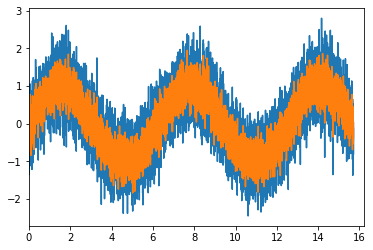

In [4]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

X Suavizado con Procedimiento Iterativo:  [-0.85931145 -0.16227857  0.08815305 ...  0.03662928 -0.3452464
 -0.84999896]
X Suavizado con Procedimiento Vectorizado:  [-0.85931145 -0.16227857  0.08815305 ...  0.03662928 -0.3452464
 -0.84999896]


Text(0.5, 1.0, 'Suavizado Vectorizado')

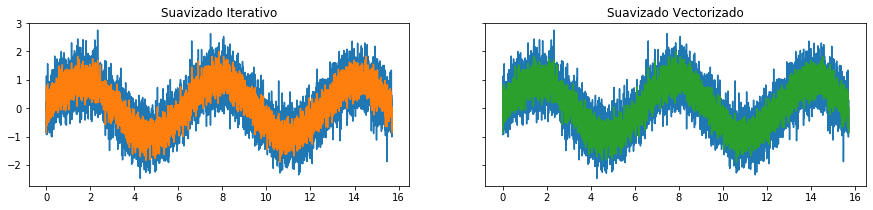

In [5]:
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de x
ys =  y.copy()
ys_vect = y.copy()

for n in range(1,len(y)-1):
    ys[n] = (y[n-1] + y[n] + y[n+1])/3

# Procedimiento Vectorizado:
# Se utiliza slicing para obtener:
# y[n] = y[1:-1] la porción de n-2 elementos intermedios, pues los extremos son iguales a y
# y[n-1] = y[:-2] la porción de n-2 elementos, que no incluyen a los dos últimos elementos
# y[n+1] = y[2:] la porción de n-2 elementos, que no incluyen a los dos primeros elementos
ys_vect[1:-1] = (y[:-2] + y[1:-1] + y[2:])/3

# Se muestran ambos vectores, verificando que son iguales
print("X Suavizado con Procedimiento Iterativo: ",ys)
print("X Suavizado con Procedimiento Vectorizado: ",ys_vect)

# Comparativa Gráfica
fig, ax = plt.subplots(1,2,figsize=(15, 3),sharey=True)
ax[0].plot(x,y)
ax[0].plot(x,ys)
ax[0].set_title('Suavizado Iterativo')

ax[1].plot(x,y)
ax[1].plot(x,ys_vect,'tab:green')
ax[1].set_title('Suavizado Vectorizado')

## Ejercicio No. 3:

**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [6]:
# Función para calcular Entropía
def calcular_entropia(distribucion):
    return -np.log2(distribucion)*distribucion

# Llamada a función
calcular_entropia([0.25,0.75])

array([0.5       , 0.31127812])

## Ejercicio No. 4

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

In [7]:
def g(x):
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia
    
gastos = np.array([100,50,25,100])
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [8]:
# Función de Costo
def c(x):         
    return (np.power(x,2) + x + np.log(0.0001*x) - np.sqrt(0.54*x))/100

# Función de Ganancia Neta
def ganancia_neta(x,g,c):
    return g(x)-c(x)

# Cálculo de Ganancia Neta sobre Vector de Gasto
gastos = np.array([100,50,25,100])
ganancia = ganancia_neta(gastos,g,c)

print("Ganancia neta:",ganancia)

Ganancia neta: [20298.85689469  2574.42504495   330.9752857  20298.85689469]


## Ejercicio No. 5

#### Aritmetica acumulativa

En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

**Ejemplo aplicado** En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion **np.cumsum** para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [9]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


## Ejercicio No. 6

#### Estadística descriptiva

https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.statistics.html

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [10]:
x = np.array([1,2,3,4,5,6,7,8,9,2,2])

In [11]:
# Función para calcular la moda
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    cuenta = np.bincount(x)
    return (cuenta.argmax(),cuenta[cuenta.argmax()]) # (valor,conteo)

# Llamada a función
print(mode(x))

(2, 3)


## Ejercicio No. 7

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [12]:
# tu codigo aqui (~ 3 lineas de codigo)

# Función para calcular Entropía
def calcular_entropia_agregada(distribucion):
    return np.sum(-np.log2(distribucion)*distribucion)

# Llamada a función
calcular_entropia_agregada([0.25,0.75])

0.8112781244591328

## Ejercicio No. 8

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [13]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return np.nansum(Y*np.log(Y_hat)*-1)

y  = np.array([1,0,0])
y_hat = np.array([0.7,0.2,0.1])

cross_entropy(y,y_hat)

0.35667494393873245

## Ejercicio No. 9

**Ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [14]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2)))
    

errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

3.1622776601683795
2.449489742783178


Basados en esta información, el **modelo 2** sería el mejor, ya que tiene el menor error de los dos.

## Ejercicio No. 10

**Ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [15]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return x / magnitud(x)
    
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


## Ejercicio No. 11

**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [16]:
# Aplicar la red neuronal sobre los siguientes datos X 
X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

In [17]:
# Definición de la función de la red neuronal
def neural_net(x,HL1,HL2,OL):
    HL = np.array([np.dot(x,HL1),np.dot(x,HL2)]) # Cálculo vectorizado de salida de cada neurona intermedia
    return np.dot(HL,OL) # Cálculo vectorizado de la capa de salida

# Parámetros particulares del ejercicio
hidden_layer1 = np.array([0.25,0.37])
hidden_layer2 = np.array([-8,14])
output_layer = np.array([4,9])

In [18]:
# Llamada para X1
print(neural_net(X1,hidden_layer1,hidden_layer2,output_layer))
# Llamada para X2
print(neural_net(X2,hidden_layer1,hidden_layer2,output_layer))
# Llamada para X3
print(neural_net(X3,hidden_layer1,hidden_layer2,output_layer))
# Llamada para X4
print(neural_net(X4,hidden_layer1,hidden_layer2,output_layer))
# Llamada para X5
print(neural_net(X5,hidden_layer1,hidden_layer2,output_layer))

56.2856
1176.36
0.0
56.48
2.9573553121785787


## Ejercicio No. 12

**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

X Suavizado con Procedimiento Iterativo:  [-0.04224659  0.42971914  0.76769791  0.93463923  0.87931849  0.71802737
  0.43743369  0.02829178 -0.39519628 -0.76343634 -0.91214183 -0.92695682
 -0.74642612 -0.4708108  -0.13238056]
X Suavizado con Procedimiento Filtro Dot Product:  [-0.04224659  0.42971914  0.76769791  0.93463923  0.87931849  0.71802737
  0.43743369  0.02829178 -0.39519628 -0.76343634 -0.91214183 -0.92695682
 -0.74642612 -0.4708108  -0.13238056]


Text(0.5, 1.0, 'Suavizado Filtro Dot Product')

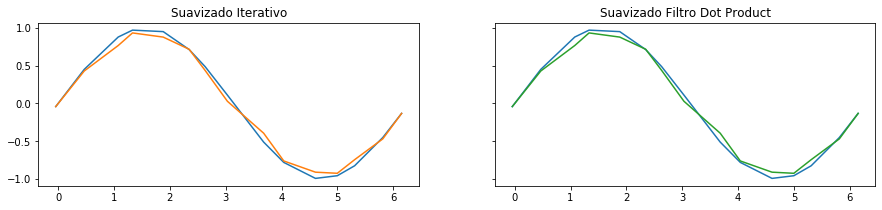

In [19]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) + ruido
y = np.sin(x)

filtro = np.array([1/3,1/3,1/3])

## tu codigo aqui (~ 3 linea de codigo)
y_filtro = y.copy()
for n in range(1,len(y)-1):
    y_filtro[n] = np.dot(np.array([y[n-1],y[n],y[n+1]]),filtro) # se realiza el producto punto por grupos de tres   
    
# Código de Comparativa    
# Ejemplo anterior
ys = y.copy()
for n in range(1,len(y)-1):
    ys[n] = (y[n-1] + y[n] + y[n+1])/3

# Se muestran ambos vectores, verificando que son iguales
print("X Suavizado con Procedimiento Iterativo: ",ys)
print("X Suavizado con Procedimiento Filtro Dot Product: ",y_filtro)

# Comparativa Gráfica
fig, ax = plt.subplots(1,2,figsize=(15, 3),sharey=True)
ax[0].plot(x,y)
ax[0].plot(x,ys)
ax[0].set_title('Suavizado Iterativo')

ax[1].plot(x,y)
ax[1].plot(x,y_filtro,'tab:green')
ax[1].set_title('Suavizado Filtro Dot Product')

## Ejercicio No. 13

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule un nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [20]:
x = np.linspace(-2,2,9)

## tu codigo aqui (~ 4 linea de codigo)
def valor_absoluto(X):
    return (( [X<0] * X)*-2 + X)[0]   # Nótese que este código funciona aún cuando x no es un linspace.

# Código Prueba
print(x)
valor_absoluto(x)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]


array([2. , 1.5, 1. , 0.5, 0. , 0.5, 1. , 1.5, 2. ])

## Ejercicio No. 14

**Ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [21]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    y = ([x<0]*x*-2 + x)[0]  # Valor Absoluto en cada posicion
    h = ([y<1]*y)[0] # Máscara a los elementos menores a 1 (mayores a 1 se vuelven cero)
    h[h>0] = 1 # Finalmente, los mayores a 1 restantes se vuelven 1
    ##
    return h
    
x = np.array([0.1,-2,0.5,5])
print(x)
print(h(x))

[ 0.1 -2.   0.5  5. ]
[1. 0. 1. 0.]


## Ejercicio No. 15

**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [22]:
x = np.linspace(-10,10,20)

condicion = [x<0,(0<=x)*(x<1),(1<=x)*(x<2),x>=2]
resultado = [-x,x**3,x**2,4]

k = np.select(condicion,resultado)

print(x)
print(k)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
[10.          8.94736842  7.89473684  6.84210526  5.78947368  4.73684211
  3.68421053  2.63157895  1.57894737  0.52631579  0.14579385  2.49307479
  4.          4.          4.          4.          4.          4.
  4.          4.        ]


##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).


## Ejercicio No. 16

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [23]:
x = np.linspace(-10,10,20)
print(x)

k=np.piecewise(x,[x<0,(x>=0)*(x<1),(1<=x)*(x<2),x>=2],[lambda x: -x,lambda x: x**3,lambda x: x**2,4])
print(k)


[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
[10.          8.94736842  7.89473684  6.84210526  5.78947368  4.73684211
  3.68421053  2.63157895  1.57894737  0.52631579  0.14579385  2.49307479
  4.          4.          4.          4.          4.          4.
  4.          4.        ]


*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [24]:
# Definición de la función por tramos m(x)
def m(x):
    return np.piecewise(x,[x<0,(x>=0)*(x<1),x>=1],[lambda x:np.exp(2*x),1,lambda x:np.exp(1-x)])

# Llamada a la función m(x)
print(m(x))

[2.06115362e-09 1.69205523e-08 1.38905265e-07 1.14030986e-06
 9.36110360e-06 7.68477620e-05 6.30863493e-04 5.17892437e-03
 4.25151525e-02 3.49018071e-01 1.00000000e+00 5.60488044e-01
 1.95620456e-01 6.82750741e-02 2.38292347e-02 8.31683351e-03
 2.90272519e-03 1.01310355e-03 3.53591445e-04 1.23409804e-04]


## Ejercicio No. 17

#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy

In [25]:
def proyeccion_vectorial(v,w):
    return (np.dot(v,w) / (magnitud(w)**2))*w

x = np.array([1,2])
y = np.array([3,4])

proyeccion_vectorial(x,y)

array([1.32, 1.76])

* Proyección vectorial
    * Interpretación:
La proyección vectorial de un vector **a** sobre un vector **b** puede interpretarse como la componente de **a** que va en la dirección de **b**. Es decir, esta proyección es un vector que es paralelo a **b**. Como puede verse, no es lo mismo la proyección de **a** sobre **b** y la proyección de **b** sobre **a**. Una proyección en términos generales, es la sombra de un vector sobre otro.

    * Aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil: Existe un algoritmo de Machine Learning que se utiliza para resolver problemas de clasificación / regresión llamado **Support Vector Machine** que utiliza los conceptos de proyección vectorial.
    
    
* Producto cruz
    * calculo en numpy

In [26]:
def cross_product(u,v):
    w = np.empty_like(u)
    w[0] = u[1]*v[2] - u[2]*v[1]
    w[1] = u[2]*v[0] - u[0]*v[2]
    w[2] = u[0]*v[1] - u[1]*v[0]
    return w

x = np.array([2,0,1])
y = np.array([1,-1,3])
cross_product(x,y)

array([ 1, -5, -2])

 * Producto cruz  
   * Interpretación: 
    El producto cruz, también llamado producto vectorial, es una operación entre dos vectores en un espacio tridimensional, cuyo resultado es un vector que es siempre perpendicular a los vectores que lo generaron. La magnitud esta dada por el paralelogramo formado por los vectores generadores y la dirección está dada (informalmente hablando) por la "regla de la mano derecha", es decir, sale del plano cuando el primer vector está "más a la derecha" del segundo vector, cuando ambos están centrados en el mismo punto.
    El producto cruz es máximo cuando los vectores son perpendiculares (opuesto a lo que ocurre con el producto punto, que es cero cuando los vectores son perpendiculares).
    
   * Aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo: En Física el producto cruz es ampliamente utilizado para calcular variables. Por ejemplo, el TORQUE, que es el resultado del producto vectorial (cruz) entre el radio o distancia (vector que determina el punto de aplicación de una fuerza) y la fuerza (como vector).
